# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


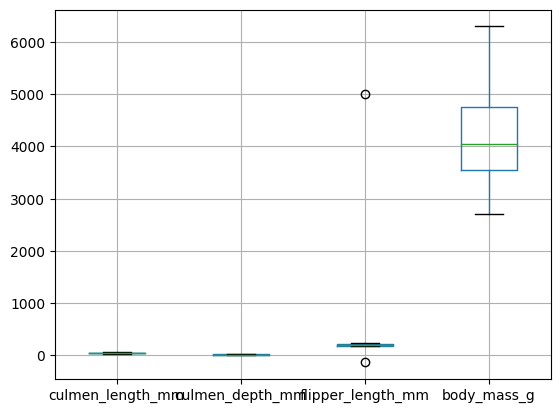

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE
   culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0              39.1             18.7  ...           0         1
1              39.5             17.4  ...           1         0
2              40.3             18.0  ...           1         0
4              36.7             19.3  ...           1         0
5              39.3             20.6  ...           0         1

[5 rows x 6 columns]
[[-0.90552018  0.79312591 -1.42812496 -0.56970896 -0.99103121  0.99700149]
 [-0.83193838  0.12850298 -1.07152207 -0.50757924  1.00904996 -1.00300753]
 [-0.68477478  0.43525202 -0.42963687 -1.1910061   1.00904996 -1.00300753]
 ...
 [ 1.17316569 -0.74061931  1.49601872  1.91547962 -0.99103121 

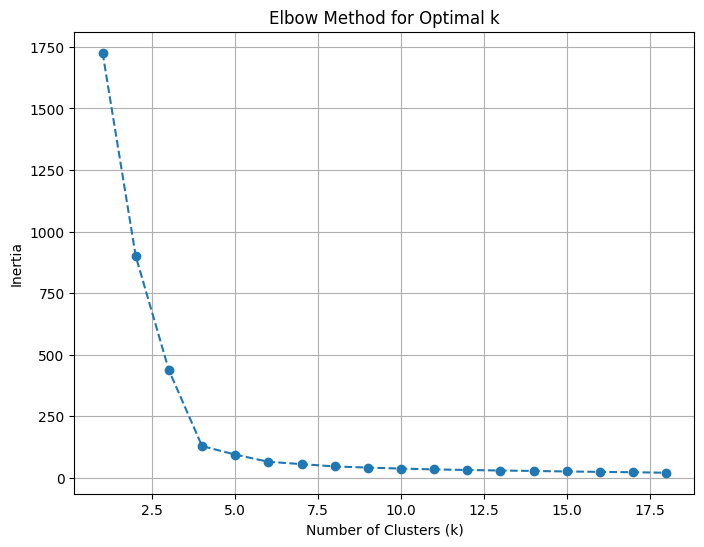

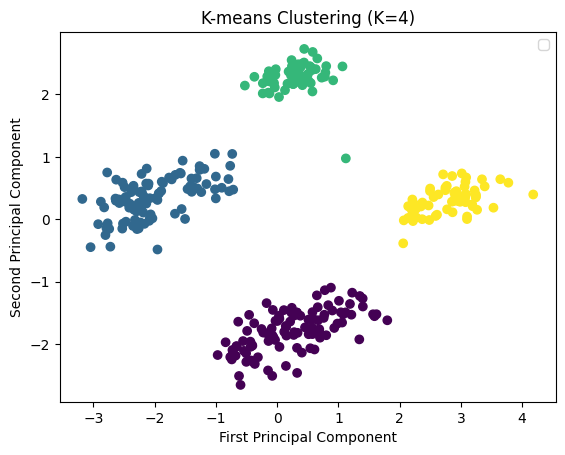

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()
penguins_df.boxplot()  
plt.show()
penguins_clean = penguins_df.dropna()
print(penguins_clean[penguins_clean['flipper_length_mm']>4000])
print(penguins_clean[penguins_clean['flipper_length_mm']<0])  #24/2
penguins_clean = penguins_clean.drop([9,14])
df=pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
print(df.head())
scaler=StandardScaler()
x=scaler.fit_transform(df)
print(x)
penguins_preprocessed = pd.DataFrame(data=x,columns=df.columns)
penguins_preprocessed.head() # 25/2
pca =PCA(n_components=None)
dfx_pca=pca.fit(penguins_preprocessed)
explained_variance_ratio = dfx_pca.explained_variance_ratio_
print(explained_variance_ratio)
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(penguins_PCA)
inertia = []

for k in range (1,19):
    kmeans=KMeans(n_clusters=k,random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 19), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()       # KASPER_AS
n_clusters=4
kmeans=KMeans(n_clusters=n_clusters,random_state=42).fit(penguins_PCA)

plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

penguins_clean ['label']=kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins



